In [34]:
import pandas as pd
from nltk import word_tokenize
import os
import matplotlib.pyplot as plt
import random
import random
import pickle
import math
import numpy as np
import json
from sklearn.model_selection import train_test_split

In [2]:
dataframe=pd.read_csv('/media/msi/Secondary/kaggle/mcq_ans_almost_same/DataSet/Train.csv')

In [3]:
dataframe.shape

(31499, 3)

In [23]:
dataframe.head()

,question,answer_text,distractor
0,Meals can be served,in rooms at 9:00 p. m.,"'outside the room at 3:00 p. m.', 'in the dini..."
1,It can be inferred from the passage that,The local government can deal with the problem...,"'If some tragedies occur again ', ' relevant d..."
2,The author called Tommy 's parents in order to,help them realize their influence on Tommy,"'blame Tommy for his failing grades', 'blame T..."
3,It can be inferred from the passage that,the writer is not very willing to use idioms,'idioms are the most important part in a langu...
4,How can we deal with snake wounds according to...,Stay calm and do n't move .,'Cut the wound and suck the poison out .'


In [5]:
print(dataframe['distractor'][800])
dist_list=dataframe['distractor'][800].split(",")
print(dist_list)

'An ESL Class', 'Three Korean Women'
["'An ESL Class'", " 'Three Korean Women'"]


In [29]:
train,test = train_test_split(dataframe, test_size=0.2, random_state=1)

In [30]:
train.shape

(25199, 3)

In [31]:
test.shape

(6300, 3)

# Distractors cleaning and checking the distribution


In [6]:
def clean_distractor(word):
    wd=word.replace('.',"").replace("'",'').replace('?','')
    if not wd:
        return ''
    tokens=word_tokenize(wd)
    return " ".join(tokens)

In [7]:
clean_distractor(dist_list[0])

'An ESL Class'

In [8]:
total=0
count_dict=dict()
for i,row in dataframe.iterrows():
        dist_list=row['distractor'].split(",")
        length=len(dist_list)
        try:
            temp=count_dict[length]
            temp=temp+1
            count_dict[length]=temp
        except KeyError:
            count_dict[length]=1
            
print("average amount of distractors:",total/dataframe.shape[0])
print("distractors :",count_dict)

average amount of distractors: 0.0
distractors : {1: 9151, 2: 8753, 3: 11657, 4: 1219, 5: 318, 6: 290, 7: 41, 8: 26, 9: 23, 10: 7, 11: 1, 12: 10, 15: 2, 29: 1}


<BarContainer object of 14 artists>

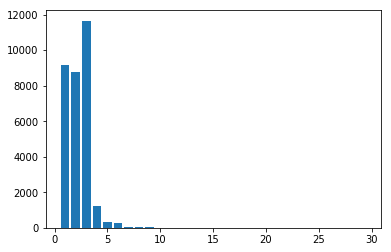

In [9]:
plt.bar(list(count_dict.keys()),list(count_dict.values()))

# Loading the vocab and setting locale to eng

In [10]:
def load_vocab():
    ret = list()
    for i,row in dataframe.iterrows():
        dist_list=row['distractor'].split(",")
        for each_dist_list in dist_list:
            dist_list_cleaned=clean_distractor(each_dist_list)
            list_words=dist_list_cleaned.split(" ")
            ret.extend(list_words)
    return set(ret)

In [11]:
vocab=load_vocab()

In [12]:
len(vocab)

23408

In [13]:
import locale
locale.setlocale(locale.LC_ALL, '')

'en_IN'

In [14]:
vocab_file="vocab.txt"
data_dir="/media/msi/Secondary/kaggle/mcq_ans_almost_same/vocab_data_dir"
output = os.path.join(data_dir, vocab_file)
with open(output, 'w') as out:
    for wd in sorted(vocab, key=locale.strxfrm):
        out.write(wd + '\n')

# Generating positive and negative samples

In [41]:
def convert_distractor(distractors):
    list_distractors=list()
    for each_distractor in distractors.split(","):
            each_distractor=clean_distractor(each_distractor)
            list_distractors.append(each_distractor)
    return list_distractors

def data_neg_creator(dataframe):
    total_list=list()
    for i,rows in dataframe.iterrows():
        try:
            temp=dict()
            distractors=rows['distractor']
            random_id=random.randint(0,dataframe.shape[0]) 
            negative_id= random_id if random_id!=i else random.randint(0,dataframe.shape[0]) 
            list_distractors=convert_distractor(distractors)
            negative_distractors=convert_distractor(dataframe.iloc[negative_id]['distractor'])
            temp.update({"distractor":list_distractors,
                        "neg_samples":negative_distractors,
                        "answers":rows['answer_text'],
                        "question":rows['question']})
            total_list.append(temp)
        except  Exception as err:
            print(str(err))
    return total_list

def data_without_neg_creator(dataframe):
    total_list=list()
    for i,rows in dataframe.iterrows():
        try:
            temp=dict()
            distractors=rows['distractor']
            random_id=random.randint(0,dataframe.shape[0]) 
            negative_id= random_id if random_id!=i else random.randint(0,dataframe.shape[0]) 
            list_distractors=convert_distractor(distractors)
            negative_distractors=convert_distractor(dataframe.iloc[negative_id]['distractor'])
            temp.update({"distractor":list_distractors,
#                         "neg_samples":negative_distractors,
                        "answers":rows['answer_text'],
                        "question":rows['question']})
            total_list.append(temp)
        except  Exception as err:
            print(str(err))
    return total_list

def json_write(data,filename):
    path=os.path.join(data_dir,filename)
    with open(path, 'w+') as outfile:
        json.dump(data, outfile)

In [39]:
train_=json_write(data_neg_creator(train),"train_neg.json")

In [42]:
train_=json_write(data_without_neg_creator(train),"train.json")

In [40]:
test_=json_write(data_neg_creator(test),"test_neg.json")

single positional indexer is out-of-bounds
single positional indexer is out-of-bounds


In [43]:
test_=json_write(data_without_neg_creator(test),"test.json")

single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds


In [38]:
total_list[250]

{'answers': 'She was unable to feel anything .',
 'distractor': ['She had a small cut on her head',
  'She was badly cut by the propeller',
  'She lost the lower parts of her legs'],
 'neg_samples': ['his mother had no cellphone'],
 'question': 'How was Lexi in the accident ?'}

# Loading glove vectors

In [18]:
def loadGloVe(filename, vocab_exist=None):
    vocab = []
    vocab_dict = {}
    embd = []
    with open(filename, 'r') as fin:
        for line in fin:
            row = line.strip().split(' ')
            if vocab_exist is None or row[0] in vocab_exist:
                vocab.append(row[0])
                vocab_dict[row[0]] = len(vocab) - 1
                embd.append(row[1:])
        print('Loaded GloVe!')
    embd = np.array(embd)
    return vocab, vocab_dict, embd

In [22]:
loadGloVe('/media/msi/Secondary/kaggle/mcq_ans_almost_same/glove.840B.300d.txt')

KeyboardInterrupt: 